###**FAKE NEWS CLASSIFIER USING "Passive Aggressive and Tf-idf Vectorizer"**





Problem Statement : To build a model to accurately classify a news article as REAL or FAKE.

Using sklearn,  build a *TfidfVectorizer* on the provided dataset. Then, initialize a *PassiveAggressive Classifier* and fit the model. 
In the end, the accuracy score and the confusion matrix tell us how well our model fares.

# Importing all the necessary libraries

In [49]:
#First we will import all the libraries needed for the project
import numpy as np
import pandas as pd
import itertools    #to return iterators

#sklearn is a machine learning library
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer  #import TfIdf Vectorizer to convert text strings to meaningful numericals
from sklearn.linear_model import PassiveAggressiveClassifier  #initialize PassiveAgressive Classifier to fit the model
from sklearn.metrics import accuracy_score, confusion_matrix  #for finding the accuracy and the confusion matrix
from sklearn.metrics import plot_confusion_matrix             #from the graphical view of the confusion matrix
from sklearn.metrics import classification_report

##*Data Exploration*

In [50]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [51]:
df=pd.read_csv("/content/drive/MyDrive/news.csv")

# df=pd.read_csv("/content/drive/MyDrive/submit.csv")

# printing the shape of dataset = no of rows and columns
print("(Rows,Columns) = ",end="")
print(df.shape)

# printing first 20 rows of the dataframe
df.head(20)

(Rows,Columns) = (6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [52]:
print(df.columns)  #gives the list of columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')


In [53]:
labels=df.label
labels.head(20)

0     FAKE
1     FAKE
2     REAL
3     FAKE
4     REAL
5     FAKE
6     FAKE
7     REAL
8     REAL
9     REAL
10    REAL
11    REAL
12    FAKE
13    FAKE
14    REAL
15    REAL
16    FAKE
17    FAKE
18    REAL
19    REAL
Name: label, dtype: object

#Split the dataset for training and testing

In [54]:
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)
#20 percent data will be used for training
#the column text will be taken as x_train and the column to be trained is the labels.

In [55]:
# Counting number of rows and columns in the training data
print('Shape of Training Data: ', x_train.shape)

Shape of Training Data:  (5068,)


# Building and intializing the  TfidfVectorizer

In [56]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
# printing the stopwords in English
print('Stop Words are:\n',stopwords)
t_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7) 
#this will stop the english words 
#words which occur more than 70 percent of the artices will be discarded

t_train=t_vectorizer.fit_transform(x_train.astype(str)) 

t_test=t_vectorizer.transform(x_test.astype(str))

Stop Words are:
 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same'

# Removing null valued rows in dataset

In [57]:
#checking for noisy data and droping null rows
print('Number of Null values in dataset: ', df['text'].isna().sum())

# Dropping all rows where text column is NaN
df.dropna(axis=0, how="any", thresh=None, subset=['text'], inplace=True)
df = df.fillna(' ')

Number of Null values in dataset:  0


# Checking length of articles and removing articles with length less than 50 words

In [58]:
# Checking length of each article
length = []
[length.append(len(str(text))) for text in df['text']]
df['length'] = length

print('Minimum Length: ', min(df['length']), '\nMaximum Length: ', max(df['length']), '\nAverage Length: ', round(sum(df['length'])/len(df['length'])))

# Minimum length is 1. We need to spot some outliers and get rid of them. Counting how many outliers are there
print('\nNumber of articles with less than 50 words: ', len(df[df['length'] < 50]))

# Skimming through such short texts just to be sure
print(df['text'][df['length'] < 50])

# Removing outliers, it will reduce overfitting
df = df.drop(df['text'][df['length'] < 50].index, axis = 0)

print('\nMinimum Length: ', min(df['length']), '\nMaximum Length: ', max(df['length']), '\nAverage Length: ', round(sum(df['length'])/len(df['length'])))


Minimum Length:  1 
Maximum Length:  115372 
Average Length:  4707

Number of articles with less than 50 words:  45
106                                                  
238     Hillary Clinton can’t believe she’s losing.  
710                                                  
806                                                  
919                                                  
940                                                  
1268       Posted: Nov 6th, 2016 by MADJEZ   MADJEZ  
1664                                                 
1736                                                 
1851                                                 
1883                                                 
1941                                                 
2244                                                 
2261      Should the U.S. Continue to Support Israel?
2426                                                 
2576                                                 
2650                

# Finding accuracy score

In [59]:
#to find the value of  max_iter from 1 to 100 which gives the highest accuracy we will use a loop
score11=[0]*101
for max_iter in range (1,101):
  pac1=PassiveAggressiveClassifier(max_iter=max_iter)
  pac1.fit(t_train,y_train)
  y_pred=pac1.predict(t_test)
  score11[max_iter]=accuracy_score(y_test,y_pred)
  print(max_iter,end=" ")
  print(f'Accuracy: {round(score11[max_iter]*100,2)}%')
print("  ")
print("The highest value of accuracy is at max-iter of value:" ,end=" ")
print(score11.index(max(score11))) #print the value of iter where value is max
print('ACCURACY SCORE OF THE TEST DATA: ',end="")
print(round(max(score11)*100),end=" %")

1 Accuracy: 92.9%
2 Accuracy: 92.66%
3 Accuracy: 92.9%
4 Accuracy: 92.9%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

5 Accuracy: 92.98%
6 Accuracy: 92.66%
7 Accuracy: 92.9%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


8 Accuracy: 92.9%
9 Accuracy: 92.42%
10

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


 Accuracy: 92.98%
11 Accuracy: 92.74%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


12 Accuracy: 92.66%
13 Accuracy: 92.9%
14 Accuracy: 93.05%
15 Accuracy: 92.98%
16 Accuracy: 92.74%
17 Accuracy: 92.5%
18 Accuracy: 92.9%
19 Accuracy: 93.29%
20 Accuracy: 93.05%
21 Accuracy: 92.34%
22 Accuracy: 92.74%
23 Accuracy: 93.13%
24 Accuracy: 92.74%
25 Accuracy: 92.27%
26 Accuracy: 92.66%
27 Accuracy: 92.5%
28 Accuracy: 92.82%
29 Accuracy: 92.9%
30 Accuracy: 92.9%
31 Accuracy: 92.74%
32 Accuracy: 92.66%
33 Accuracy: 92.82%
34 Accuracy: 92.98%
35 Accuracy: 92.9%
36 Accuracy: 93.13%
37 Accuracy: 92.66%
38 Accuracy: 92.58%
39 Accuracy: 92.66%
40 Accuracy: 92.82%
41 Accuracy: 93.13%
42 Accuracy: 92.9%
43 Accuracy: 92.82%
44 Accuracy: 93.05%
45 Accuracy: 92.9%
46 Accuracy: 92.82%
47 Accuracy: 93.21%
48 Accuracy: 92.82%
49 Accuracy: 93.05%
50 Accuracy: 92.74%
51 Accuracy: 93.05%
52 Accuracy: 92.74%
53 Accuracy: 92.82%
54 Accuracy: 92.9%
55 Accuracy: 92.5%
56 Accuracy: 92.74%
57 Accuracy: 92.58%
58 Accuracy: 92.74%
59 Accuracy: 92.74%
60 Accuracy: 92.9%
61 Accuracy: 92.66%
62 Accuracy:

###THE CONFUSION MATRIX

In [60]:
m=confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
# m=confusion_matrix(y_test,y_pred, labels=[1,0])
print(m)

[[591  47]
 [ 42 587]]


### *PLOTTING THE CONFUSION MATRIX USING SEABORN*

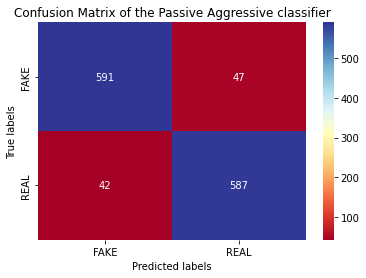

<Figure size 1080x1080 with 0 Axes>

In [61]:
import seaborn as sn
import matplotlib.pyplot as plt

ax=plt.subplot()

sn.heatmap(m ,annot=True,ax = ax,fmt='g',cmap='RdYlBu') 
 #cmap = sets the color 
 #fmt is used to pass value as string
plt.figure(figsize=(15,15))  #size of figure

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['FAKE', 'REAL'])
ax.yaxis.set_ticklabels(['FAKE', 'REAL'])

ax.set_title('Confusion Matrix of the Passive Aggressive classifier') #title of matrix
print(" ")  

# Classification Report

In [62]:
print('\nCLASSIFICATION REPORT: \n',classification_report(y_test, y_pred, labels=['FAKE', 'REAL']))
# print('\nCLASSIFICATION REPORT: \n',classification_report(y_test, y_pred, labels=[1,0])) # 1-- FAKE and  0 -- REAL
#print(df.shape)


CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

        FAKE       0.93      0.93      0.93       638
        REAL       0.93      0.93      0.93       629

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



In [63]:
classifier=PassiveAggressiveClassifier(max_iter=100)
classifier.fit(t_train,y_train)

PassiveAggressiveClassifier(max_iter=100)

In [64]:
def fake_news_det(news):
    input_data = [news]
    vectorized_input_data = t_vectorizer.transform(input_data)
    prediction = classifier.predict(vectorized_input_data)
    print(prediction)

# Testing over one input

In [65]:
fake_news_det("""Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. 
In the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. 
The word â€œunprecedentedâ€ has been thrown around so often this election that it ought to be retired. But itâ€™s still unprecedented for the nominee of a major political party to go war with the FBI. 
But thatâ€™s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillaryâ€™s opponent in this election. 
The FBI is under attack by everyone from Obama to CNN. Hillaryâ€™s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldnâ€™t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. 
The FBIâ€™s leadership is being warned that the entire left-wing establishment will form a lynch mob if they continue going after Hillary. And the FBIâ€™s credibility is being attacked by the media and the Democrats to preemptively head off the results of the investigation of the Clinton Foundation and Hillary Clinton. 
The covert struggle between FBI agents and Obamaâ€™s DOJ people has gone explosively public. 
The New York Times has compared Comey to J. Edgar Hoover. Its bizarre headline, â€œJames Comey Role Recalls Hooverâ€™s FBI, Fairly or Notâ€ practically admits up front that itâ€™s spouting nonsense. The Boston Globe has published a column calling for Comeyâ€™s resignation. Not to be outdone, Time has an editorial claiming that the scandal is really an attack on all women. 
James Carville appeared on MSNBC to remind everyone that he was still alive and insane. He accused Comey of coordinating with House Republicans and the KGB. And you thought the â€œvast right wing conspiracyâ€ was a stretch. 
Countless media stories charge Comey with violating procedure. Do you know whatâ€™s a procedural violation? Emailing classified information stored on your bathroom server. 
Senator Harry Reid has sent Comey a letter accusing him of violating the Hatch Act. The Hatch Act is a nice idea that has as much relevance in the age of Obama as the Tenth Amendment. But the cable news spectrum quickly filled with media hacks glancing at the Wikipedia article on the Hatch Act under the table while accusing the FBI director of one of the most awkward conspiracies against Hillary ever. 
If James Comey is really out to hurt Hillary, he picked one hell of a strange way to do it. 
Not too long ago Democrats were breathing a sigh of relief when he gave Hillary Clinton a pass in a prominent public statement. If he really were out to elect Trump by keeping the email scandal going, why did he trash the investigation? Was he on the payroll of House Republicans and the KGB back then and playing it coy or was it a sudden development where Vladimir Putin and Paul Ryan talked him into taking a look at Anthony Weinerâ€™s computer? 
Either Comey is the most cunning FBI director that ever lived or heâ€™s just awkwardly trying to navigate a political mess that has trapped him between a DOJ leadership whose political futures are tied to Hillaryâ€™s victory and his own bureau whose apolitical agents just want to be allowed to do their jobs. 
The only truly mysterious thing is why Hillary and her associates decided to go to war with a respected Federal agency. Most Americans like the FBI while Hillary Clinton enjoys a 60% unfavorable rating. 
And itâ€™s an interesting question. 
Hillaryâ€™s old strategy was to lie and deny that the FBI even had a criminal investigation underway. Instead her associates insisted that it was a security review. The FBI corrected her and she shrugged it off. But the old breezy denial approach has given way to a savage assault on the FBI. 
Pretending that nothing was wrong was a bad strategy, but it was a better one that picking a fight with the FBI while lunatic Clinton associates try to claim that the FBI is really the KGB. 
There are two possible explanations. 
Hillary Clinton might be arrogant enough to lash out at the FBI now that she believes that victory is near. The same kind of hubris that led her to plan her victory fireworks display could lead her to declare a war on the FBI for irritating her during the final miles of her campaign. 
But the other explanation is that her people panicked. 
Going to war with the FBI is not the behavior of a smart and focused presidential campaign. Itâ€™s an act of desperation. When a presidential candidate decides that her only option is to try and destroy the credibility of the FBI, thatâ€™s not hubris, itâ€™s fear of what the FBI might be about to reveal about her. 
During the original FBI investigation, Hillary Clinton was confident that she could ride it out. And she had good reason for believing that. But that Hillary Clinton is gone. In her place is a paranoid wreck. Within a short space of time the â€œpositiveâ€ Clinton campaign promising to unite the country has been replaced by a desperate and flailing operation that has focused all its energy on fighting the FBI. 
Thereâ€™s only one reason for such bizarre behavior. 
The Clinton campaign has decided that an FBI investigation of the latest batch of emails poses a threat to its survival. And so itâ€™s gone all in on fighting the FBI. Itâ€™s an unprecedented step born of fear. Itâ€™s hard to know whether that fear is justified. But the existence of that fear already tells us a whole lot. 
Clinton loyalists rigged the old investigation. They knew the outcome ahead of time as well as they knew the debate questions. Now suddenly they are no longer in control. And they are afraid. 
You can smell the fear. 
The FBI has wiretaps from the investigation of the Clinton Foundation. Itâ€™s finding new emails all the time. And Clintonworld panicked. The spinmeisters of Clintonworld have claimed that the email scandal is just so much smoke without fire. All thatâ€™s here is the appearance of impropriety without any of the substance. But this isnâ€™t how you react to smoke. Itâ€™s how you respond to a fire. 
The misguided assault on the FBI tells us that Hillary Clinton and her allies are afraid of a revelation bigger than the fundamental illegality of her email setup. The email setup was a preemptive cover up. The Clinton campaign has panicked badly out of the belief, right or wrong, that whatever crime the illegal setup was meant to cover up is at risk of being exposed. 
The Clintons have weathered countless scandals over the years. Whatever they are protecting this time around is bigger than the usual corruption, bribery, sexual assaults and abuses of power that have followed them around throughout the years. This is bigger and more damaging than any of the allegations that have already come out. And they donâ€™t want FBI investigators anywhere near it. 
The campaign against Comey is pure intimidation. Itâ€™s also a warning. Any senior FBI people who value their careers are being warned to stay away. The Democrats are closing ranks around their nominee against the FBI. Itâ€™s an ugly and unprecedented scene. It may also be their last stand. 
Hillary Clinton has awkwardly wound her way through numerous scandals in just this election cycle. But sheâ€™s never shown fear or desperation before. Now that has changed. Whatever she is afraid of, it lies buried in her emails with Huma Abedin. And it can bring her down like nothing else has.  """)

['FAKE']


# Saving the model

In [66]:
import pickle
pickle.dump(classifier,open('model.pkl', 'wb'))

In [67]:
# load the model from disk
loaded_model = pickle.load(open('model.pkl', 'rb'))

In [68]:
def fake_news_det1(news):
    input_data = [news]
    vectorized_input_data =  t_vectorizer.transform(input_data)
    prediction = loaded_model.predict(vectorized_input_data)
    print(prediction)

In [69]:
fake_news_det("""Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. 
In the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. 
The word â€œunprecedentedâ€ has been thrown around so often this election that it ought to be retired. But itâ€™s still unprecedented for the nominee of a major political party to go war with the FBI. 
But thatâ€™s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillaryâ€™s opponent in this election. 
The FBI is under attack by everyone from Obama to CNN. Hillaryâ€™s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldnâ€™t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. 
The FBIâ€™s leadership is being warned that the entire left-wing establishment will form a lynch mob if they continue going after Hillary. And the FBIâ€™s credibility is being attacked by the media and the Democrats to preemptively head off the results of the investigation of the Clinton Foundation and Hillary Clinton. 
The covert struggle between FBI agents and Obamaâ€™s DOJ people has gone explosively public. 
The New York Times has compared Comey to J. Edgar Hoover. Its bizarre headline, â€œJames Comey Role Recalls Hooverâ€™s FBI, Fairly or Notâ€ practically admits up front that itâ€™s spouting nonsense. The Boston Globe has published a column calling for Comeyâ€™s resignation. Not to be outdone, Time has an editorial claiming that the scandal is really an attack on all women. 
James Carville appeared on MSNBC to remind everyone that he was still alive and insane. He accused Comey of coordinating with House Republicans and the KGB. And you thought the â€œvast right wing conspiracyâ€ was a stretch. 
Countless media stories charge Comey with violating procedure. Do you know whatâ€™s a procedural violation? Emailing classified information stored on your bathroom server. 
Senator Harry Reid has sent Comey a letter accusing him of violating the Hatch Act. The Hatch Act is a nice idea that has as much relevance in the age of Obama as the Tenth Amendment. But the cable news spectrum quickly filled with media hacks glancing at the Wikipedia article on the Hatch Act under the table while accusing the FBI director of one of the most awkward conspiracies against Hillary ever. 
If James Comey is really out to hurt Hillary, he picked one hell of a strange way to do it. 
Not too long ago Democrats were breathing a sigh of relief when he gave Hillary Clinton a pass in a prominent public statement. If he really were out to elect Trump by keeping the email scandal going, why did he trash the investigation? Was he on the payroll of House Republicans and the KGB back then and playing it coy or was it a sudden development where Vladimir Putin and Paul Ryan talked him into taking a look at Anthony Weinerâ€™s computer? 
Either Comey is the most cunning FBI director that ever lived or heâ€™s just awkwardly trying to navigate a political mess that has trapped him between a DOJ leadership whose political futures are tied to Hillaryâ€™s victory and his own bureau whose apolitical agents just want to be allowed to do their jobs. 
The only truly mysterious thing is why Hillary and her associates decided to go to war with a respected Federal agency. Most Americans like the FBI while Hillary Clinton enjoys a 60% unfavorable rating. 
And itâ€™s an interesting question. 
Hillaryâ€™s old strategy was to lie and deny that the FBI even had a criminal investigation underway. Instead her associates insisted that it was a security review. The FBI corrected her and she shrugged it off. But the old breezy denial approach has given way to a savage assault on the FBI. 
Pretending that nothing was wrong was a bad strategy, but it was a better one that picking a fight with the FBI while lunatic Clinton associates try to claim that the FBI is really the KGB. 
There are two possible explanations. 
Hillary Clinton might be arrogant enough to lash out at the FBI now that she believes that victory is near. The same kind of hubris that led her to plan her victory fireworks display could lead her to declare a war on the FBI for irritating her during the final miles of her campaign. 
But the other explanation is that her people panicked. 
Going to war with the FBI is not the behavior of a smart and focused presidential campaign. Itâ€™s an act of desperation. When a presidential candidate decides that her only option is to try and destroy the credibility of the FBI, thatâ€™s not hubris, itâ€™s fear of what the FBI might be about to reveal about her. 
During the original FBI investigation, Hillary Clinton was confident that she could ride it out. And she had good reason for believing that. But that Hillary Clinton is gone. In her place is a paranoid wreck. Within a short space of time the â€œpositiveâ€ Clinton campaign promising to unite the country has been replaced by a desperate and flailing operation that has focused all its energy on fighting the FBI. 
Thereâ€™s only one reason for such bizarre behavior. 
The Clinton campaign has decided that an FBI investigation of the latest batch of emails poses a threat to its survival. And so itâ€™s gone all in on fighting the FBI. Itâ€™s an unprecedented step born of fear. Itâ€™s hard to know whether that fear is justified. But the existence of that fear already tells us a whole lot. 
Clinton loyalists rigged the old investigation. They knew the outcome ahead of time as well as they knew the debate questions. Now suddenly they are no longer in control. And they are afraid. 
You can smell the fear. 
The FBI has wiretaps from the investigation of the Clinton Foundation. Itâ€™s finding new emails all the time. And Clintonworld panicked. The spinmeisters of Clintonworld have claimed that the email scandal is just so much smoke without fire. All thatâ€™s here is the appearance of impropriety without any of the substance. But this isnâ€™t how you react to smoke. Itâ€™s how you respond to a fire. 
The misguided assault on the FBI tells us that Hillary Clinton and her allies are afraid of a revelation bigger than the fundamental illegality of her email setup. The email setup was a preemptive cover up. The Clinton campaign has panicked badly out of the belief, right or wrong, that whatever crime the illegal setup was meant to cover up is at risk of being exposed. 
The Clintons have weathered countless scandals over the years. Whatever they are protecting this time around is bigger than the usual corruption, bribery, sexual assaults and abuses of power that have followed them around throughout the years. This is bigger and more damaging than any of the allegations that have already come out. And they donâ€™t want FBI investigators anywhere near it. 
The campaign against Comey is pure intimidation. Itâ€™s also a warning. Any senior FBI people who value their careers are being warned to stay away. The Democrats are closing ranks around their nominee against the FBI. Itâ€™s an ugly and unprecedented scene. It may also be their last stand. 
Hillary Clinton has awkwardly wound her way through numerous scandals in just this election cycle. But sheâ€™s never shown fear or desperation before. Now that has changed. Whatever she is afraid of, it lies buried in her emails with Huma Abedin. And it can bring her down like nothing else has.  """)

['FAKE']
